**Tried to write a model from scratch but results were not good**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/iiit delhi/train1'


Mounted at /content/drive


In [8]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout, MaxPool2D
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt


In [19]:
DATASET_PATH  = path        #image path
IMAGE_SIZE    = (256, 256)  #image size
NUM_CLASSES   = 62          #number of classes
BATCH_SIZE    = 32          #batch size
NUM_EPOCHS    = 26          #total number of epochs
tf.random.set_seed(89)      #seed for reproducibility

#Image preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   featurewise_center=False,
                                   samplewise_center=False,
                                   featurewise_std_normalization=False,
                                   samplewise_std_normalization=False,
                                   zca_whitening=False,
                                   rotation_range=20,
                                   zoom_range = 0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   validation_split=0.2)

train_batches = train_datagen.flow_from_directory(directory=path,
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  subset="training",
                                                  batch_size=BATCH_SIZE)



valid_batches = train_datagen.flow_from_directory(directory=path,
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  subset="validation",
                                                  batch_size=BATCH_SIZE)


Found 1984 images belonging to 62 classes.
Found 496 images belonging to 62 classes.


Function to Plot Images

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Loading a batch of images and visualizing using plotImages function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

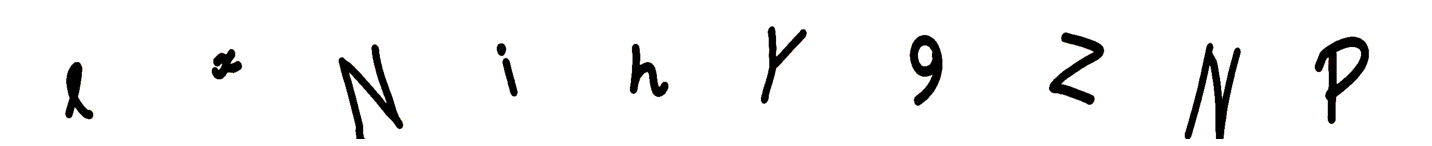

In [21]:
#train_batches.image_shape
x,y = train_batches.next()
plotImages(x*255)

Model

In [22]:
# show class indices
#print('****************')
#for cls, idx in train_batches.class_indices.items():
#    print('Class #{} = {}'.format(idx, cls))
#print('****************')


model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape = train_batches.image_shape))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(NUM_CLASSES,activation="softmax"))




model.compile(optimizer=Adam(lr=2e-3),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# train the model
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        callbacks=callbacks_list,
                        epochs = NUM_EPOCHS)

# save trained weights


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/26
62/62 [==============================] - 459s 7s/step - loss: 47.5273 - accuracy: 0.0341 - val_loss: 3459.5977 - val_accuracy: 0.0146

Epoch 00001: val_accuracy improved from -inf to 0.01458, saving model to weights-improvement-01-0.01.hdf5
Epoch 2/26
62/62 [==============================] - 87s 1s/step - loss: 4.5922 - accuracy: 0.0216 - val_loss: 606.7745 - val_accuracy: 0.0083

Epoch 00002: val_accuracy did not improve from 0.01458
Epoch 3/26
62/62 [==============================] - 86s 1s/step - loss: 4.1865 - accuracy: 0.0193 - val_loss: 6.4201 - val_accuracy: 0.0042

Epoch 00003: val_accuracy did not improve from 0.01458
Epoch 4/26
62/62 [==============================] - 87s 1s/step - loss: 4.1304 - accuracy: 0.0139 - val_loss: 89.1321 - val_accuracy: 0.0167

Epoch 00004: val_accuracy improved from 0.01458 to 0.01667, saving model to weights-improvement-04-0.02.hdf5
Epoch 5/26
62/62 [==============================] - 86s 1s/step - loss: 4.1293 - accuracy: 0.0143 - val

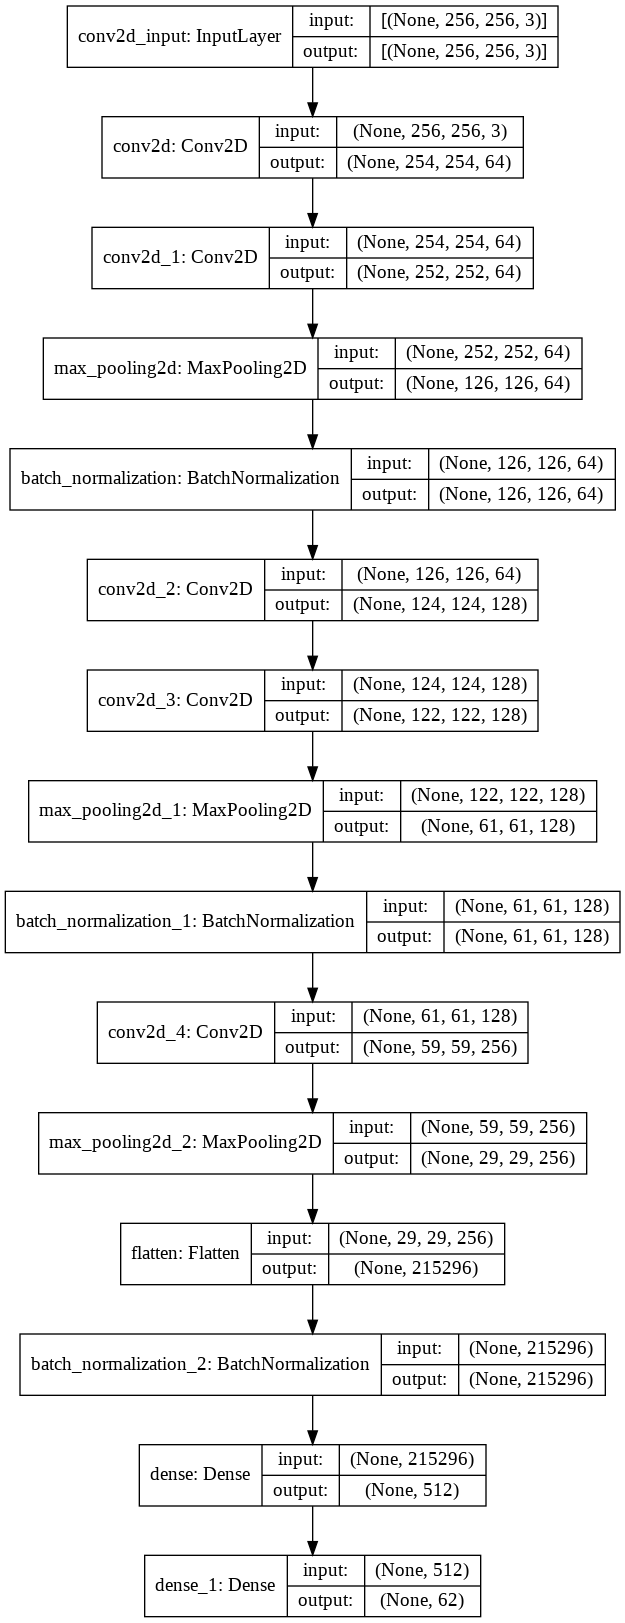

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
import matplotlib.pyplot as plt


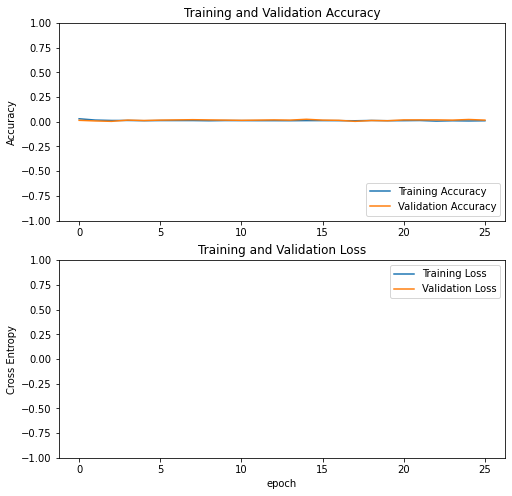

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([-1,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([-1,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()